In [38]:
# Import numpy, pandas, matplotlib.pyplot, seaborn and sklearn modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [39]:
# Import csv file into Pandas Dataset
people = pd.read_csv("height_mass.csv")
people

,Height (m),Mass (kg)
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


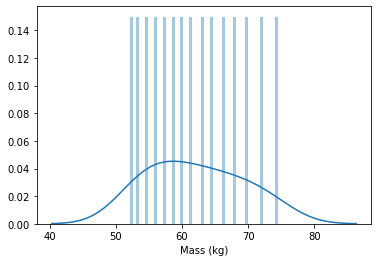

In [40]:
# Use a seaborn distplot to show the mass distribution
sb.distplot(people["Mass (kg)"],bins=50)

Observation: The graph shows the distribution of mass in kg using a seaborn distplot. There is a one record per mass and have 15 records. Between two records, there is interruption of mass. The curve goes to up at the range between 50 to 60 (m).

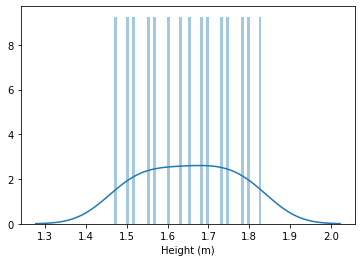

In [41]:
# Use a seaborn distplot to show distribution for height
sb.distplot(people["Height (m)"], bins=50)

Observation: This graph shows the distribution of height in m using a seaborn distplot. There are 15 records and the curve shows it's interval from 1.6 to 1.8 (m) around 2.

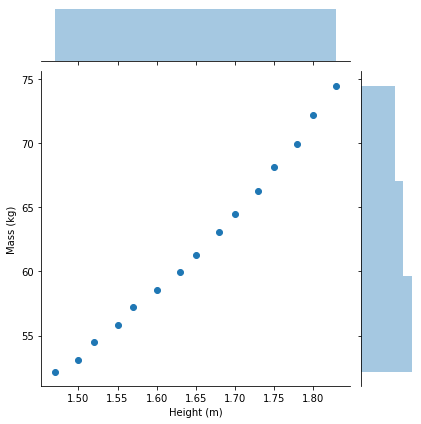

In [42]:
# Use seaborn jointplot to plot height and mass
sb.jointplot(people["Height (m)"], people["Mass (kg)"])

Observation: The graph indicates the jointplot of height and mass. This plotted graph shows that the data follows the boundary formation. There is little bit deflection in data. 

In [43]:
# Use sklearn to split the data into training and testing 
from sklearn.model_selection import train_test_split

x=people.drop(labels="Mass (kg)", axis=1)
y=people["Mass (kg)"]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

In [44]:
# Fit the data into training data
lm=LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# prediction on testing data
predictions=lm.predict(x_test)

In [46]:
# Print out the error metrics
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3327752670501226
MSE: 0.14411997630712686
RMSE: 0.37963136897143634


In [47]:
# Predict specific mass
prediction=lm.predict([[1.70]])
prediction

array([65.07168242])

Observation: The data indicates that it matches almost with real data. The RMSE is 0.80 and the mass that was predicted is 0.645, that is almost near.

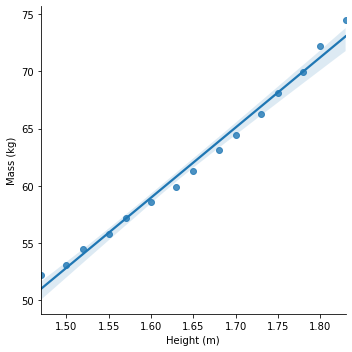

In [48]:
# Use seaborn lmplot to show data
sb.lmplot("Height (m)", "Mass (kg)", data=people, fit_reg=True)